# Case 2 - Siemens Advanta

Group W


## 1. Loading the Data

In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

The group started by loading the two data files, `Case2_Market data.xlsx` and `Case2_Sales data.csv`.

In [2]:
sales_db = pd.read_csv("datasets\Case2_Sales data.csv", sep=";")
market_db = pd.read_excel("datasets\Case2_Market data.xlsx")

## 2. Data Understanding

### Sales Data
The group decided to take a look a sales_db first.

In [3]:
sales_db

,DATE,Mapped_GCK,Sales_EUR
0,01.10.2018,#1,0
1,02.10.2018,#1,0
2,03.10.2018,#1,0
3,04.10.2018,#1,0
4,05.10.2018,#1,0
...,...,...,...
9797,23.08.2019,#12,0
9798,23.08.2019,#36,1015
9799,12.08.2019,#12,0
9800,28.08.2019,#8,"43763,91"


In [4]:
sales_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


`Sales_EUR` was composed of numeric values yet it was stored as an object. There was also an error in `DATE` which is stored as a object instead of a date. These were the first errors to address so that EDA could be performed.

In [5]:
sales_db['Sales_EUR'] = sales_db['Sales_EUR'].str.replace(',', '.')
sales_db['Sales_EUR'] = sales_db['Sales_EUR'].astype(float)
sales_db['DATE'] = pd.to_datetime(sales_db['DATE'], format='%d.%m.%Y')

In [6]:
# export data to csv (PowerBI use)
sales_db.to_csv('sales_overview.csv', decimal=',')

In [7]:
sales_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        9802 non-null   datetime64[ns]
 1   Mapped_GCK  9802 non-null   object        
 2   Sales_EUR   9802 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 229.9+ KB


In [8]:
sales_db[(sales_db['DATE'] >= '01-01-2021') & (sales_db['DATE'] <= '31-01-2021')][['Sales_EUR']].sum()

Sales_EUR    33057643.26
dtype: float64

In [9]:
sales_db.describe()

,DATE,Sales_EUR
count,9802,9.802000e+03
mean,2020-07-19 17:55:48.785961984,2.727857e+05
min,2018-10-01 00:00:00,-5.063812e+05
25%,2019-08-30 00:00:00,0.000000e+00
50%,2020-07-26 12:00:00,0.000000e+00
75%,2021-06-09 00:00:00,0.000000e+00
max,2022-04-30 00:00:00,4.112799e+07
std,NaN,2.230789e+06


Using the describe method the group found that there was at least one negative value in the `Sales_EUR` column. The group then decided to check for more negative data entries.

In [10]:
negative_sales = sales_db[sales_db['Sales_EUR'] < 0]
negative_sales

,DATE,Mapped_GCK,Sales_EUR
90,2022-02-02,#6,-54.00
96,2022-04-04,#11,-587.59
102,2021-12-02,#3,-183.50
130,2022-03-02,#6,-93.88
155,2021-05-03,#5,-166.24
...,...,...,...
9333,2019-09-03,#20,-6.60
9466,2018-11-05,#4,-2029.91
9487,2019-04-30,#13,-26.31
9681,2020-07-31,#9,-35.25


There were more than 200 rows with negative sales values, but were there any underlying patterns that could explain these anomalies?

In [11]:
negative_sales['DATE'].dt.year.value_counts()

DATE
2019    88
2021    73
2020    72
2022    32
2018    11
Name: count, dtype: int64

In [12]:
negative_sales['DATE'].dt.month.value_counts()

DATE
4     31
3     30
12    29
11    28
2     26
10    25
1     23
9     21
5     18
7     15
6     15
8     15
Name: count, dtype: int64

In [13]:
negative_sales['DATE'].dt.day.value_counts()

DATE
2     61
4     36
3     35
1     20
6     12
17    10
5     10
30     8
12     8
26     8
7      7
23     5
22     5
27     5
31     4
10     4
16     3
9      3
13     3
25     3
29     3
8      3
24     3
21     3
11     3
20     2
18     2
14     2
19     2
28     2
15     1
Name: count, dtype: int64

The negative values happened at random times, but could they possibly have been connected to a single `Mapped_GCK` (or a group of GCK's)?

In [14]:
negative_sales['Mapped_GCK'].value_counts()

Mapped_GCK
#3     56
#1     51
#5     43
#4     40
#8     19
#9     11
#6     10
#12    10
#36     8
#11     7
#14     7
#16     6
#20     5
#13     3
Name: count, dtype: int64

Much like the dates, it seemed random. The group concluded that there likely wasn't any explanation and this was possibly a data entry error.

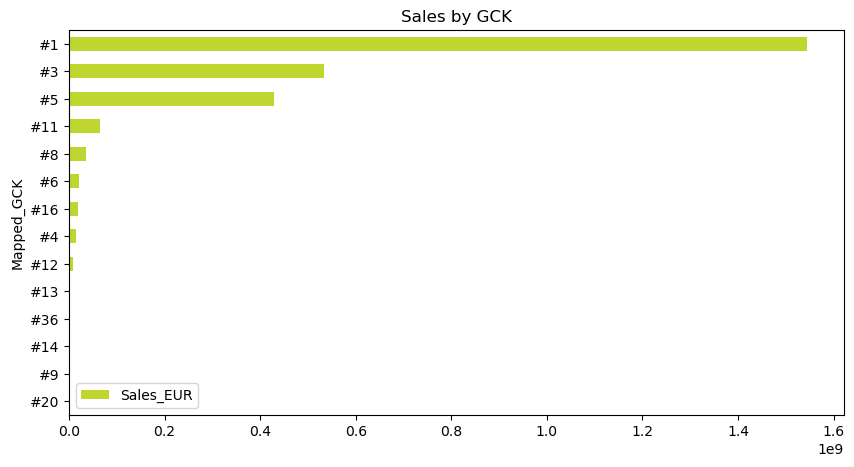

In [15]:
sales_by_gck = sales_db.groupby('Mapped_GCK')[['Sales_EUR']].sum().sort_values(by= 'Sales_EUR', ascending=True).round(1)
sales_by_gck.plot(kind='barh', figsize=(10,5), color='#bfd630')

plt.title('Sales by GCK')
plt.show()

Let's look at the sales evolution by month over the years using plotly:

In [16]:
sales_db["Year"] = sales_db["DATE"].dt.year
sales_db["Month"] = sales_db["DATE"].dt.month

sales_grouped = sales_db.groupby(["Year", "Month"])["Sales_EUR"].sum().reset_index()

fig = px.line(sales_grouped, x="Month", y="Sales_EUR", color="Year", title="Monthly Sales by Year")
fig.show()


Group Sales by Year-Month and GCK:

In [17]:
sales_db["Year_Month"] = sales_db["DATE"].dt.to_period("M").astype(str)

In [18]:
monthly_product_sales = sales_db.groupby(["Year_Month", "Mapped_GCK"])["Sales_EUR"].sum().reset_index()
monthly_product_sales

,Year_Month,Mapped_GCK,Sales_EUR
0,2018-10,#1,36098918.79
1,2018-10,#11,1021303.50
2,2018-10,#12,28686.33
3,2018-10,#13,27666.10
4,2018-10,#14,5770.00
...,...,...,...
597,2022-04,#4,302057.04
598,2022-04,#5,8884607.53
599,2022-04,#6,333705.61
600,2022-04,#8,1336220.96


In [19]:
sales_db['Mapped_GCK'].nunique()

14

### Market Data

In [20]:
market_db

,Unnamed: 0,China,China.1,France,France.1,Germany,Germany.1,Italy,Italy.1,Japan,...,production index.6,production index.7,production index.8,production index.9,production index.10,production index.11,production index.12,production index.13,production index.14,production index.15
0,Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,...,France: Machinery and equipment n.e.c.,Germany: Machinery and equipment n.e.c.,United States: Electrical equipment,World: Electrical equipment,Switzerland: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,Japan: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment
1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
2,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,...,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
3,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,...,148.121841,102.130104,119.220779,NaN,76.690307,138.30955,152.880234,140.288741,117.225685,97.670815
4,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,...,125.482231,90.961426,117.441124,NaN,71.552403,115.55733,137.796875,106.271197,105.335777,87.253983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2021m12,310.763183,310.763183,100.565744,134.589504,118.103281,149.364286,94.006826,150.482735,127.771735,...,112.791885,129.188248,109.624107,132.281006,114.326241,121.065762,72.915611,109.005151,80.763306,97.773956
217,2022m1,235.956129,235.956129,85.743503,108.15632,94.55061,120.353403,86.851008,101.258277,110.460181,...,90.558372,92.343117,111.36467,122.236023,108.999212,112.324119,74.355736,95.369065,77.944954,98.599052
218,2022m2,235.956129,235.956129,90.60354,117.71577,103.987916,129.383676,106.583758,120.956538,117.879631,...,97.766502,102.820961,114.6884,127.373421,103.672183,115.55733,91.182419,103.950687,79.001831,106.128059
219,2022m3,329.413367,329.413367,107.843548,136.85872,121.308119,151.201314,124.637966,153.645142,152.000561,...,114.72081,122.049515,115.164093,152.452942,98.345154,145.254965,102.475998,133.743932,96.704582,119.948433


First, the group decided to fix the column names so that only one index existed. This was done by joining the country names at the end (or beginning) of the column name.

In [21]:
new_col_names = ['DATE',
                'Production Index Machinery & Electricals China', 'Shipments Index Machinery & Electricals China',
                'Production Index Machinery & Electricals France', 'Shipments Index Machinery & Electricals France',
                'Production Index Machinery & Electricals Germany', 'Shipments Index Machinery & Electricals Germany',
                'Production Index Machinery & Electricals Italy', 'Shipments Index Machinery & Electricals Italy',
                'Production Index Machinery & Electricals Japan', 'Shipments Index Machinery & Electricals Japan',
                'Production Index Machinery & Electricals Switzerland', 'Shipments Index Machinery & Electricals Switzerland',
                'Production Index Machinery & Electricals United Kingdom', 'Shipments Index Machinery & Electricals United Kingdom',
                'Production Index Machinery & Electricals United States', 'Shipments Index Machinery & Electricals United States',
                'Production Index Machinery & Electricals Europe', 'Shipments Index Machinery & Electricals Europe',
                'World: Price of Base Metals', 'World: Price of Energy', 'World: Price of Metals & Minerals', 'World: Price of Natural gas index', 'World: Price of Crude oil, average', 'World: Price of Copper',
                'United States: EUR in LCU',
                'Producer Prices United States: Electrical equipment',
                'Producer Prices United Kingdom: Electrical equipment',
                'Producer Prices Italy: Electrical equipment',
                'Producer Prices France: Electrical equipment',
                'Producer Prices Germany: Electrical equipment',
                'Producer Prices China: Electrical equipment',
                'Production Index United States: Machinery and equipment n.e.c.',
                'Prodcution Index World: Machinery and equipment n.e.c.',
                'Production Index Switzerland: Machinery and equipment n.e.c.',
                'Production Index United Kingdom: Machinery and equipment n.e.c.',
                'Production Index Italy: Machinery and equipment n.e.c.', 
                'Production Index  Japan: Machinery and equipment n.e.c.',
                'Production Index France: Machinery and equipment n.e.c.',
                'Production Index Germany: Machinery and equipment n.e.c.',
                'Production Index United States: Electrical equipment',
                'Production Index World: Electrical equipment',
                'Production Index Switzerland: Electrical equipment',
                'Production Index United Kingdom: Electrical equipment',
                'Production Index Italy: Electrical equipment',
                'Production Index Japan: Electrical equipment',
                'Production Index France: Electrical equipment','Production Index Germany: Electrical equipment']

market_db.columns = new_col_names
market_db.drop(0, inplace=True)

In [22]:
market_db

,DATE,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,Production Index Machinery & Electricals Italy,Shipments Index Machinery & Electricals Italy,Production Index Machinery & Electricals Japan,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,...,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
2,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,...,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
3,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,...,148.121841,102.130104,119.220779,NaN,76.690307,138.30955,152.880234,140.288741,117.225685,97.670815
4,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,...,125.482231,90.961426,117.441124,NaN,71.552403,115.55733,137.796875,106.271197,105.335777,87.253983
5,2004m5,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,...,116.64975,88.082901,117.899216,NaN,66.4145,119.269534,143.860535,101.60871,96.616508,84.675552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2021m12,310.763183,310.763183,100.565744,134.589504,118.103281,149.364286,94.006826,150.482735,127.771735,...,112.791885,129.188248,109.624107,132.281006,114.326241,121.065762,72.915611,109.005151,80.763306,97.773956
217,2022m1,235.956129,235.956129,85.743503,108.15632,94.55061,120.353403,86.851008,101.258277,110.460181,...,90.558372,92.343117,111.36467,122.236023,108.999212,112.324119,74.355736,95.369065,77.944954,98.599052
218,2022m2,235.956129,235.956129,90.60354,117.71577,103.987916,129.383676,106.583758,120.956538,117.879631,...,97.766502,102.820961,114.6884,127.373421,103.672183,115.55733,91.182419,103.950687,79.001831,106.128059
219,2022m3,329.413367,329.413367,107.843548,136.85872,121.308119,151.201314,124.637966,153.645142,152.000561,...,114.72081,122.049515,115.164093,152.452942,98.345154,145.254965,102.475998,133.743932,96.704582,119.948433


With the new names in order the group decided to create a copy of the data where the codes such as "MAB_ELE_PRO156" where removed. This was done in a separate dataset because at this point the group had no knowledge of the relevance of these codes. To this point the group had theorized that these were probably codes that represented shortened versions of the column names.

In [23]:
market_db.drop(1, inplace=True)
market_db.reset_index(drop=True, inplace=True)
market_db.head()

,DATE,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,Production Index Machinery & Electricals Italy,Shipments Index Machinery & Electricals Italy,Production Index Machinery & Electricals Japan,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
0,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,...,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
1,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,...,148.121841,102.130104,119.220779,NaN,76.690307,138.30955,152.880234,140.288741,117.225685,97.670815
2,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,...,125.482231,90.961426,117.441124,NaN,71.552403,115.55733,137.796875,106.271197,105.335777,87.253983
3,2004m5,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,...,116.64975,88.082901,117.899216,NaN,66.4145,119.269534,143.860535,101.60871,96.616508,84.675552
4,2004m6,27.009138,27.009138,133.785737,106.641482,99.010814,95.10874,136.424935,110.889719,120.33292,...,143.248734,100.978699,119.499107,NaN,61.276596,128.849416,144.315308,116.655248,118.45871,95.401802


In [24]:
for col in market_db.columns[1:48]:
    market_db[col] = pd.to_numeric(market_db[col], errors='coerce')

market_db.dtypes

DATE                                                                object
Production Index Machinery & Electricals China                     float64
Shipments Index Machinery & Electricals China                      float64
Production Index Machinery & Electricals France                    float64
Shipments Index Machinery & Electricals France                     float64
Production Index Machinery & Electricals Germany                   float64
Shipments Index Machinery & Electricals Germany                    float64
Production Index Machinery & Electricals Italy                     float64
Shipments Index Machinery & Electricals Italy                      float64
Production Index Machinery & Electricals Japan                     float64
Shipments Index Machinery & Electricals Japan                      float64
Production Index Machinery & Electricals Switzerland               float64
Shipments Index Machinery & Electricals Switzerland                float64
Production Index Machiner

In [25]:
market_db1 = market_db.copy()
market_db1

,DATE,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,Production Index Machinery & Electricals Italy,Shipments Index Machinery & Electricals Italy,Production Index Machinery & Electricals Japan,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
0,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.334010,...,118.274109,80.829010,117.723991,NaN,81.100000,120.706516,141.510864,106.161262,102.077057,85.913200
1,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,...,148.121841,102.130104,119.220779,NaN,76.690307,138.309550,152.880234,140.288741,117.225685,97.670815
2,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,...,125.482231,90.961426,117.441124,NaN,71.552403,115.557330,137.796875,106.271197,105.335777,87.253983
3,2004m5,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,...,116.649750,88.082901,117.899216,NaN,66.414500,119.269534,143.860535,101.608710,96.616508,84.675552
4,2004m6,27.009138,27.009138,133.785737,106.641482,99.010814,95.108740,136.424935,110.889719,120.332920,...,143.248734,100.978699,119.499107,NaN,61.276596,128.849416,144.315308,116.655248,118.458710,95.401802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2021m12,310.763183,310.763183,100.565744,134.589504,118.103281,149.364286,94.006826,150.482735,127.771735,...,112.791885,129.188248,109.624107,132.281006,114.326241,121.065762,72.915611,109.005151,80.763306,97.773956
215,2022m1,235.956129,235.956129,85.743503,108.156320,94.550610,120.353403,86.851008,101.258277,110.460181,...,90.558372,92.343117,111.364670,122.236023,108.999212,112.324119,74.355736,95.369065,77.944954,98.599052
216,2022m2,235.956129,235.956129,90.603540,117.715770,103.987916,129.383676,106.583758,120.956538,117.879631,...,97.766502,102.820961,114.688400,127.373421,103.672183,115.557330,91.182419,103.950687,79.001831,106.128059
217,2022m3,329.413367,329.413367,107.843548,136.858720,121.308119,151.201314,124.637966,153.645142,152.000561,...,114.720810,122.049515,115.164093,152.452942,98.345154,145.254965,102.475998,133.743932,96.704582,119.948433


In [26]:
market_db1['DATE'] = pd.to_datetime(market_db1['DATE'].str.strip().str.replace('m', '-'), format='%Y-%m')
market_db1

,DATE,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,Production Index Machinery & Electricals Italy,Shipments Index Machinery & Electricals Italy,Production Index Machinery & Electricals Japan,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
0,2004-02-01,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.334010,...,118.274109,80.829010,117.723991,NaN,81.100000,120.706516,141.510864,106.161262,102.077057,85.913200
1,2004-03-01,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,...,148.121841,102.130104,119.220779,NaN,76.690307,138.309550,152.880234,140.288741,117.225685,97.670815
2,2004-04-01,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,...,125.482231,90.961426,117.441124,NaN,71.552403,115.557330,137.796875,106.271197,105.335777,87.253983
3,2004-05-01,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,...,116.649750,88.082901,117.899216,NaN,66.414500,119.269534,143.860535,101.608710,96.616508,84.675552
4,2004-06-01,27.009138,27.009138,133.785737,106.641482,99.010814,95.108740,136.424935,110.889719,120.332920,...,143.248734,100.978699,119.499107,NaN,61.276596,128.849416,144.315308,116.655248,118.458710,95.401802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2021-12-01,310.763183,310.763183,100.565744,134.589504,118.103281,149.364286,94.006826,150.482735,127.771735,...,112.791885,129.188248,109.624107,132.281006,114.326241,121.065762,72.915611,109.005151,80.763306,97.773956
215,2022-01-01,235.956129,235.956129,85.743503,108.156320,94.550610,120.353403,86.851008,101.258277,110.460181,...,90.558372,92.343117,111.364670,122.236023,108.999212,112.324119,74.355736,95.369065,77.944954,98.599052
216,2022-02-01,235.956129,235.956129,90.603540,117.715770,103.987916,129.383676,106.583758,120.956538,117.879631,...,97.766502,102.820961,114.688400,127.373421,103.672183,115.557330,91.182419,103.950687,79.001831,106.128059
217,2022-03-01,329.413367,329.413367,107.843548,136.858720,121.308119,151.201314,124.637966,153.645142,152.000561,...,114.720810,122.049515,115.164093,152.452942,98.345154,145.254965,102.475998,133.743932,96.704582,119.948433


In [27]:
market_db1.columns

Index(['DATE', 'Production Index Machinery & Electricals China',
       'Shipments Index Machinery & Electricals China',
       'Production Index Machinery & Electricals France',
       'Shipments Index Machinery & Electricals France',
       'Production Index Machinery & Electricals Germany',
       'Shipments Index Machinery & Electricals Germany',
       'Production Index Machinery & Electricals Italy',
       'Shipments Index Machinery & Electricals Italy',
       'Production Index Machinery & Electricals Japan',
       'Shipments Index Machinery & Electricals Japan',
       'Production Index Machinery & Electricals Switzerland',
       'Shipments Index Machinery & Electricals Switzerland',
       'Production Index Machinery & Electricals United Kingdom',
       'Shipments Index Machinery & Electricals United Kingdom',
       'Production Index Machinery & Electricals United States',
       'Shipments Index Machinery & Electricals United States',
       'Production Index Machinery &

In [28]:
# export data to csv (PowerBI use)
market_db1.to_csv('market_indexes.csv', decimal=',')

In [29]:
nulls = market_db1.isnull().sum().sort_values(ascending=False)
nulls = nulls[nulls > 0]
nulls = pd.DataFrame(nulls, columns=['nulls'])
nulls['percentage'] = (nulls['nulls'] / len(market_db1) * 100).round(2)
nulls

,nulls,percentage
Producer Prices France: Electrical equipment,35,15.98
Producer Prices China: Electrical equipment,23,10.50
Producer Prices United Kingdom: Electrical equipment,18,8.22
Shipments Index Machinery & Electricals United Kingdom,18,8.22
Production Index World: Electrical equipment,11,5.02
Shipments Index Machinery & Electricals United States,1,0.46
Production Index Switzerland: Electrical equipment,1,0.46
Production Index Switzerland: Machinery and equipment n.e.c.,1,0.46
Production Index Machinery & Electricals Switzerland,1,0.46
Shipments Index Machinery & Electricals Switzerland,1,0.46


Several columns had missing data, but the ones where the missing data percentage was the highest were:
- `Shipments Index Machinery & Electricals United Kingdom` (8%)
- `Producer Prices United Kingdom: Electrical equipment` (8%)
- `Producer Prices France: Electrical equipment` (15%)
- `Producer Prices China: Electrical equipment` (10%)
- `Production Index World: Electrical equipment` (5%).

The group decided to study these columns further to see wich dates had missing values.

In [30]:
market_db_aft_2018 = market_db1[market_db1['DATE'] >= '2018-10-01']
market_db_aft_2018

,DATE,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,Production Index Machinery & Electricals Italy,Shipments Index Machinery & Electricals Italy,Production Index Machinery & Electricals Japan,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
176,2018-10-01,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,118.350514,122.456894,125.209957,...,114.720810,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
177,2018-11-01,220.519655,220.519655,99.636911,115.958210,127.404132,142.732193,107.719260,120.132032,122.624695,...,104.873100,132.987915,113.145294,128.236176,114.736013,120.467019,84.133400,111.907535,91.155960,117.163727
178,2018-12-01,241.846854,241.846854,94.690312,115.128469,120.518565,141.407661,88.783181,131.936099,122.991956,...,104.974617,137.363281,111.823624,117.043549,116.501182,105.378705,64.881248,112.524242,78.033028,89.626122
179,2019-01-01,175.668147,175.668147,90.143775,108.325154,104.776326,118.703828,99.275113,92.418842,105.514024,...,95.228432,104.432930,109.499725,111.522202,110.354610,107.174933,81.556343,95.957352,81.908257,105.406097
180,2019-02-01,175.668147,175.668147,92.551521,108.944656,109.597012,122.686997,104.586684,103.214212,114.466647,...,100.101524,112.838226,110.835655,112.666725,104.208038,110.647640,83.451233,107.309956,80.322929,103.652771
181,2019-03-01,261.642802,261.642802,107.861788,126.966216,122.534648,140.116214,114.299549,122.454318,141.637717,...,117.360405,128.612549,111.092499,131.456177,98.061466,126.214949,88.832741,131.450762,92.477066,111.388054
182,2019-04-01,219.595813,219.595813,98.677844,114.917432,110.612414,127.512006,99.732969,106.279804,107.150653,...,106.802032,115.025909,109.490013,119.415619,95.539795,113.521605,75.947449,101.308407,85.519257,102.518265
183,2019-05-01,234.169196,234.169196,94.779550,110.814496,115.712333,131.993634,118.006286,123.261639,108.940926,...,101.421318,120.207260,111.786377,122.786171,93.018125,117.593055,91.637192,101.892947,84.022011,107.468842
184,2019-06-01,261.126350,261.126350,98.978105,122.045555,108.917455,126.769557,108.231888,121.312004,117.747574,...,106.091377,116.062180,112.188866,125.168800,90.496454,123.101487,83.527031,112.251279,87.456879,95.814354
185,2019-07-01,217.053447,217.053447,100.354372,107.250458,117.126331,132.660766,114.705312,123.572862,118.878856,...,106.903557,122.279793,109.553818,125.639954,97.557132,123.939727,92.925720,114.830812,89.746788,107.675117


In [31]:
market_db_aft_2018["Year_Month"] = market_db_aft_2018["DATE"].dt.to_period("M").astype(str)
market_db_aft_2018.head()

,DATE,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,Production Index Machinery & Electricals Italy,Shipments Index Machinery & Electricals Italy,Production Index Machinery & Electricals Japan,...,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment,Year_Month
176,2018-10-01,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,118.350514,122.456894,125.209957,...,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233,2018-10
177,2018-11-01,220.519655,220.519655,99.636911,115.958210,127.404132,142.732193,107.719260,120.132032,122.624695,...,132.987915,113.145294,128.236176,114.736013,120.467019,84.133400,111.907535,91.155960,117.163727,2018-11
178,2018-12-01,241.846854,241.846854,94.690312,115.128469,120.518565,141.407661,88.783181,131.936099,122.991956,...,137.363281,111.823624,117.043549,116.501182,105.378705,64.881248,112.524242,78.033028,89.626122,2018-12
179,2019-01-01,175.668147,175.668147,90.143775,108.325154,104.776326,118.703828,99.275113,92.418842,105.514024,...,104.432930,109.499725,111.522202,110.354610,107.174933,81.556343,95.957352,81.908257,105.406097,2019-01
180,2019-02-01,175.668147,175.668147,92.551521,108.944656,109.597012,122.686997,104.586684,103.214212,114.466647,...,112.838226,110.835655,112.666725,104.208038,110.647640,83.451233,107.309956,80.322929,103.652771,2019-02


In [32]:
# Create a line plot with different lines for each product
fig = px.line(monthly_product_sales, x="Year_Month", y="Sales_EUR", color="Mapped_GCK", title="Monthly Sales by Product",
    labels={"Sales_EUR": "Sales (€)", "Year_Month": "Month-Year", "Mapped_GCK": "Product"})

fig.show()


In [33]:
merged_df = monthly_product_sales.merge(market_db_aft_2018, on="Year_Month", how="left")
merged_df.head()

,Year_Month,Mapped_GCK,Sales_EUR,DATE,Production Index Machinery & Electricals China,Shipments Index Machinery & Electricals China,Production Index Machinery & Electricals France,Shipments Index Machinery & Electricals France,Production Index Machinery & Electricals Germany,Shipments Index Machinery & Electricals Germany,...,Production Index France: Machinery and equipment n.e.c.,Production Index Germany: Machinery and equipment n.e.c.,Production Index United States: Electrical equipment,Production Index World: Electrical equipment,Production Index Switzerland: Electrical equipment,Production Index United Kingdom: Electrical equipment,Production Index Italy: Electrical equipment,Production Index Japan: Electrical equipment,Production Index France: Electrical equipment,Production Index Germany: Electrical equipment
0,2018-10,#1,36098918.79,2018-10-01,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
1,2018-10,#11,1021303.50,2018-10-01,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
2,2018-10,#12,28686.33,2018-10-01,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
3,2018-10,#13,27666.10,2018-10-01,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
4,2018-10,#14,5770.00,2018-10-01,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,...,114.72081,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233


In [34]:
# Reshape the data (long format for multiple indexes)
market_melted = market_db_aft_2018.melt(id_vars=["DATE"], var_name="Index", value_name="Price")

# Create interactive time-series plot
fig = px.line(market_melted, x="DATE", y="Price", color="Index",
              title="Market Index Evolution After 2018",
              labels={"Price": "Index Value", "DATE": "Date", "Index": "Market Index"})

fig.show()


In [35]:
numerical=market_db_aft_2018.select_dtypes(include=[np.number]).columns.tolist()
numerical

['Production Index Machinery & Electricals China',
 'Shipments Index Machinery & Electricals China',
 'Production Index Machinery & Electricals France',
 'Shipments Index Machinery & Electricals France',
 'Production Index Machinery & Electricals Germany',
 'Shipments Index Machinery & Electricals Germany',
 'Production Index Machinery & Electricals Italy',
 'Shipments Index Machinery & Electricals Italy',
 'Production Index Machinery & Electricals Japan',
 'Shipments Index Machinery & Electricals Japan',
 'Production Index Machinery & Electricals Switzerland',
 'Shipments Index Machinery & Electricals Switzerland',
 'Production Index Machinery & Electricals United Kingdom',
 'Shipments Index Machinery & Electricals United Kingdom',
 'Production Index Machinery & Electricals United States',
 'Shipments Index Machinery & Electricals United States',
 'Production Index Machinery & Electricals Europe',
 'Shipments Index Machinery & Electricals Europe',
 'World: Price of Base Metals',
 'Wor